# Changing Contrast
Changing contrast means making bright pixels more bright and dark pixels more dark

In [1]:
import numpy as np
import matplotlib.pyplot as plt

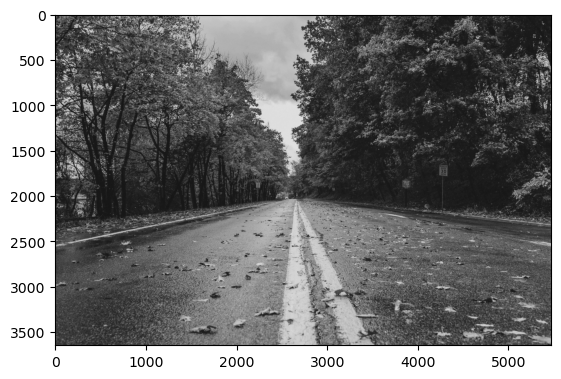

In [4]:
img = plt.imread('pictures/road_gray.jpg')
img = img[:,:,0]
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

- ### Increasing Contrast in a naive way
In this method, we set a threshold on low and high values and map all the intensities that fall in the lower range to 0 and those which fall in the upper range to 255. This is equivalent to rotating the linear function CCW.
This method blows out the details of the image as the low and high intensities get saturated but gives a sharper look.

![img](pictures/rotate%20ccw%20plot.png)

In [5]:
threshold = 50
img_high_contrast = img.copy()
img_high_contrast[img_high_contrast < threshold] = 0
img_high_contrast[img_high_contrast > 255 - threshold] = 255

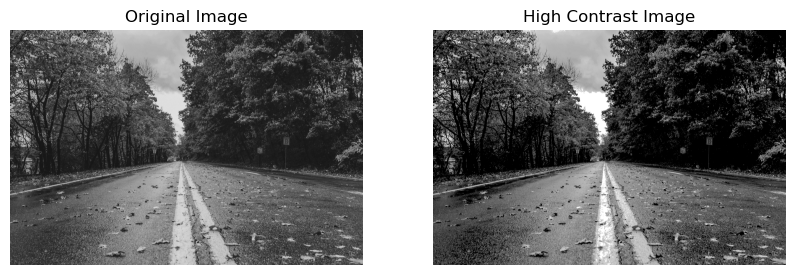

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

# High contrast image
axs[1].imshow(img_high_contrast, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('High Contrast Image')
axs[1].axis('off')

# plt.savefig('pictures/road_high_contrast.jpg')
plt.show()

- ### Increasing Contrast by expanding dynamic range
In this method, we apply linear scaling by mapping lowest significant intensity value (L) present in the image to 0 and highest value (H) to 255.

Formula:

$i_{scaled} = \frac{i-L}{H-L} \times 255$

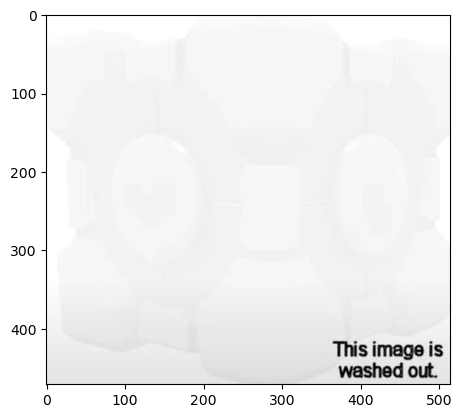

In [9]:
img2 = plt.imread('pictures/washed_out_image.jpg')
img2 = img2[:,:,0]
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.show()

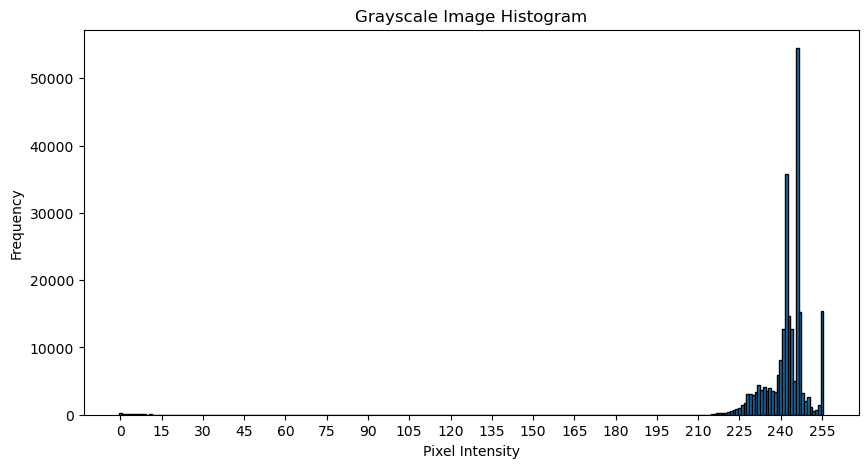

In [18]:
hist, bins = np.histogram(img2.flatten(), bins=256, range=[0, 256])

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.title('Grayscale Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xticks(np.arange(stop=256, step=15))
plt.bar(bins[:-1], hist, width=1, edgecolor='black')
plt.show()

In [87]:
L = 210
H = 255
img2_scaled = img2.copy().astype(np.float16)
img2_scaled[img2_scaled < L] = 0
img2_scaled[img2_scaled > H] = 255
img2_scaled = (img2_scaled-L)/(H-L) * 255
img2_scaled = np.clip(img2_scaled, 0, 255).astype(np.uint8)

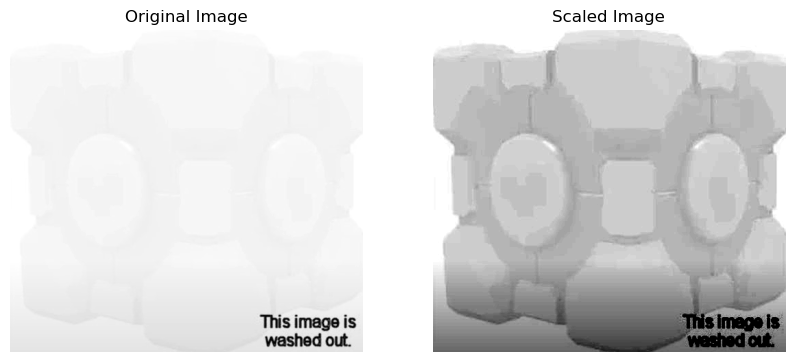

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(img2, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Scaled image
axs[1].imshow(img2_scaled, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Scaled Image')
axs[1].axis('off')

# plt.savefig('pictures/cube_high_contrast_by_scaling.jpg')
plt.show()

- ### Decreasing Contrast in a naive way
In this method, we do opposite of what we did in increasing the contrast. That's is rotating the linear function CW such that the 0 maps to a higher intensity and 255 maps to a lower intensity. This way, the dynamic range of frequencies reduce and the picture appears dull.

In [56]:
img_low_contrast = img.copy().astype(np.float16)
img_low_contrast *= 31/51   # Multiplying with a number less than 1 to bring the highest intensity value down
img_low_contrast += 50      # Adding offset to move the lowest intensity value up
img_low_contrast = img_low_contrast.astype(np.uint8)

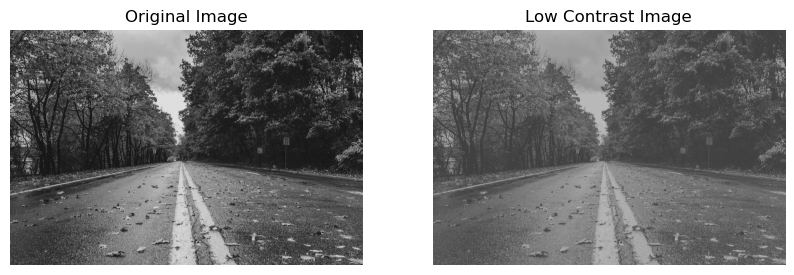

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Low Contrast image
axs[1].imshow(img_low_contrast, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Low Contrast Image')
axs[1].axis('off')

# plt.savefig('pictures/road_low_contrast.jpg')
plt.show()

- ### Histogram Equalization to Increase Constrast 

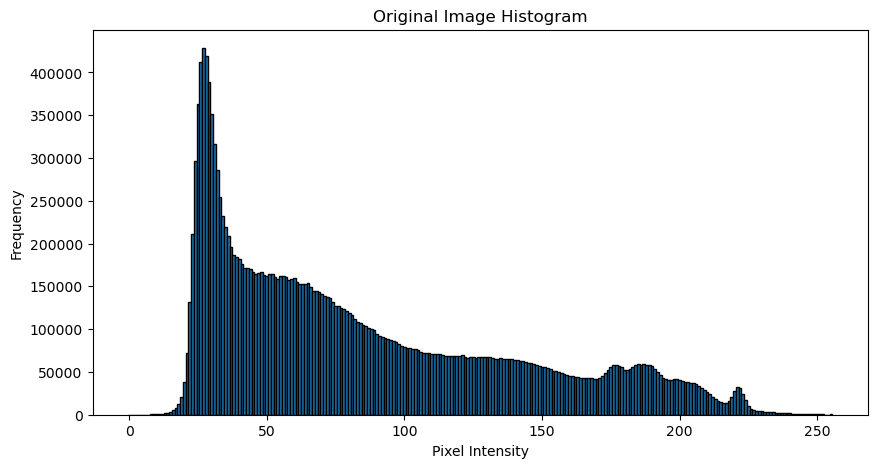

In [90]:
hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.title('Original Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.bar(bins[:-1], hist, width=1, edgecolor='black')
plt.show()

In [99]:
total_occurences = hist.sum()
PDF = hist/total_occurences
CDF = np.cumsum(PDF)
HEL = np.round(CDF * 255).astype(np.uint8)         # Histogram Equalized Level
transformed_image = HEL[img]

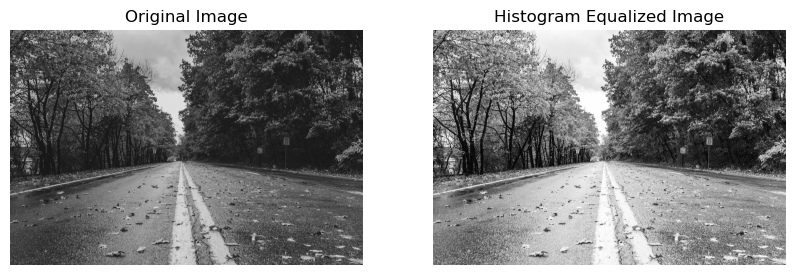

In [104]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Histogram Equalized image
axs[1].imshow(transformed_image, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Histogram Equalized Image')
axs[1].axis('off')

# plt.savefig('pictures/road_histogram_equalized.jpg')
plt.show()

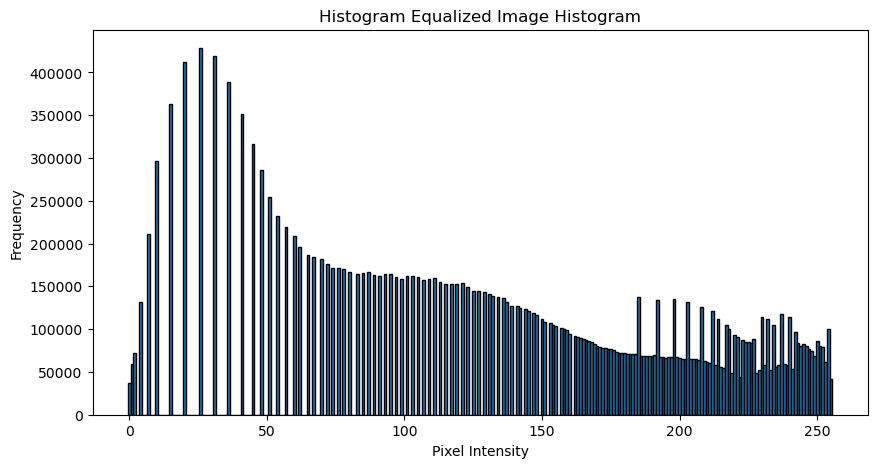

In [105]:
hist, bins = np.histogram(transformed_image.flatten(), bins=256, range=[0, 256])

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.title('Histogram Equalized Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.bar(bins[:-1], hist, width=1, edgecolor='black')
plt.show()